<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Заказчик исследования - компания "Цифра". Компания разрабатывает решения для эффективной работы промышленных предприятий. Необходимо подготовить прототип модели машинного обучения для «Цифры». Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Входные данные - параметры добычи и очистки. Необходимо построить модель, которая поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Результаты исследования будут использованы заказчиком в коммерческих целях.

**Цель исследования**: подготовить прототип модели машинного обучения по разработке решения для эффективной работы промышленных предприятий.

Ход исследования:

Входные данные от компании - параметры добычи и очистки золота из золотосодержащей руды. Перед анализом данные необходимо загрузить и подготовить к анализу, так как заказчик отметил сырость представленных данных. Следующим этапом необходимо будет провести исследовательский анализ данных, который продемонстрирует имеющиеся распределения и иные закономерности в данных. В завершении потребуется построить и обучить модель, которую хочет увидеть заказчик.

Таким образом, исследование пройдёт в 3 этапа:

1. Подготовка данных;
2. Исследовательский анализ данных;
3. Построение и обучение модели.

Заказчик дополнительно предоставил информацию по технологическому процессу восстановления золота из золотосодержащей руды.

## Подготовка данных

Перед тем, как приступить к изучению данных из файла, импортируем все нужные для текущего исследования библиотеки и модули:

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor

Сохраним в начале исследования необходимые константные переменные и вызовем функции библиотек для всего исследования:

In [2]:
RANDOM_STATE = np.random.RandomState(80222)

warnings.filterwarnings('ignore')

Прочитаем полученные от заказчика данные и сохраним их в таблицах:

In [3]:
df_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
df_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
df_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

По информации от заказчика, знаем, что таблица `df_train` содержит в себе обучающую выборку, `df_test` - тестовую выборку, а `df_full` - исходные данные. Выведем на экран 3 первые строки каждой таблицы:

In [4]:
display(df_train.head(3))
display(df_test.head(3))
display(df_full.head(3))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Получим общую информацию по таблицам. Так как таблицы `df_train` и `df_test` фактически являются подмножествами таблицы `df_full`, сконцентрируем внимание на последней:

In [5]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


В таблице содержится 19 439 наблюдений и 87 признаков. 86 из них имеют тип данных `float`, а 1 - `object`. В признаке `object` представлены даты, которые должны быть представлены в типе `datetime`. На данном этапе оставим этот признак и не будем перекодировать его без необходимости. Остальные столбцы проблем с типами данных не имеют. Также видно, что данные имеют множество пропусков, которые, без сомнений, перейдут в пропуски и в таблицах `df_train` и `df_test`. Предварительно можно утверждать, что данных для проведения исследования достаточно. Согласно документации к данным в таблицах присутствуют следующие условные обозначения:

*Технологический процесс*:
* `Rougher feed` — исходное сырье;
* `Rougher additions (или reagent additions)` — флотационные реагенты: Xanthate, Sulphate, Depressant;
* `Xanthate **` — ксантогенат (промотер, или активатор флотации);
* `Sulphate` — сульфат (на данном производстве сульфид натрия);
* `Depressant` — депрессант (силикат натрия);
* `Rougher process (англ. «грубый процесс»)` — флотация;
* `Rougher tails` — отвальные хвосты;
* `Float banks` — флотационная установка;
* `Cleaner process` — очистка;
* `Rougher Au` — черновой концентрат золота;
* `Final Au` — финальный концентрат золота;

*Параметры этапов*:
* `air amount` — объём воздуха;
* `fluid levels` — уровень жидкости;
* `feed size` — размер гранул сырья;
* `feed rate` — скорость подачи;

*Наименование признаков*:
* `rougher` — флотация;
* `primary_cleaner` — первичная очистка;
* `secondary_cleaner` — вторичная очистка;
* `final` — финальные характеристики;
* `input` — параметры сырья;
* `output` — параметры продукта;
* `state` — параметры, характеризующие текущее состояние этапа;
* `calculation` — расчётные характеристики

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака `rougher.output.recovery`, а затем найдём `MAE` между расчётами и значением признака. Для этого сначала напишем функцию с формулой эффективности обогащения:

In [6]:
#функция проверки правильности расчётов эффективности обогащения
#C - доля золота в концентрате после флотации/очистки;
#F - доля золота в сырье/концентрате до флотации/очистки;
#T - доля золота в отвальных хвостах после флотации/очистки

def recovery(C, F, T):
    effectiv = (C * (F - T)) / (F * (C - T)) * 100
    return effectiv

Добавим для удобства расчётов в новый датафрейм нужные столбцы:

In [7]:
df_train_mae = df_train[['rougher.output.concentrate_au', 'rougher.input.feed_au',
                         'rougher.output.tail_au', 'rougher.output.recovery']]

Теперь рассчитаем при помощи функции эффективность обогащения и сохраним значение в отдельном столбце:

In [8]:
df_train_mae['rougher.output.recovery_verified'] = recovery(df_train_mae['rougher.output.concentrate_au'], 
         df_train_mae['rougher.input.feed_au'], df_train_mae['rougher.output.tail_au'])

Найдём MAE между расчётами и значением признака:

In [9]:
mae = mean_absolute_error(df_train_mae['rougher.output.recovery'], df_train_mae['rougher.output.recovery_verified'])
print('MAE между расчётами и значением признака составляет:', mae)

MAE между расчётами и значением признака составляет: 9.73512347450521e-15


Убедились, что  эффективность обогащения рассчитана правильно. У нас имеется небольшая погрешность, о чём сообщает показатель MAE, однако его значение настолько низко, что им можно смело пренебречь. Далее нужно проанализировать признаки, недоступные в тестовой выборке:

In [10]:
print('Признаки, недоступные в тестовой выборке:')
set(df_train.columns) - set(df_test.columns)

Признаки, недоступные в тестовой выборке:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

Видно, что в тестовой выборке отсутствуют признаки с информацией о содержании различных ископаемых в золотосодержащей руде на различных этапах обработки. Данные признаки относятся к так называемой категории онлайн-метрик, следовательно, они недоступны на момент построения модели и выполнения ей предсказаний, поэтому и не помещены в тестовую выборку. Данное решение было абсолютно правильным. В завершении подготовки данных поработаем над небольшой предобработкой данных. Сначала оставим в обучающей выборке лишь те признаки, которые есть в тестовой:

In [11]:
df_train_chosen = df_train[df_test.columns]
df_train_chosen.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


Один столбец имеет тип данных `object`, однако в нём представлены даты. Можно было бы перевести его в формат `datetime`, однако будет проще данный столбец задать в качестве индекса для каждой таблицы:

In [12]:
df_train_chosen = df_train_chosen.set_index('date')
df_test = df_test.set_index('date')
df_full = df_full.set_index('date')

Далее поработаем с пропусками в таблицах. Мы обнаружили, что их количество мало, но они присутствуют. Заполнять средними показателями данные пропуски нельзя, поэтому заменим их специальным методом `ffill`:

In [13]:
df_train_chosen = df_train_chosen.fillna(method='ffill')
df_test = df_test.fillna(method='ffill')
df_full = df_full.fillna(method='ffill')

### Вывод

На этапе подготовке данных мы выгружили все полученные таблицы и обнаружили в них несколько важных моментов: небольшое количество пропусков, дата в некорректном типе, различное количество признаков в обучающей и тестовой выборках. Пропуски были заменены нулями, чтобы не искажать результаты и при необходимости исключить такие наблюдения из таблицы, даты установили в качестве id таблиц, а размер признаков в обучающей выборке скорректировали под размеры тестовой. Помимо этого, также проверили корректность расчётов эффективности обогащения: `MAE` между расчётами и значениями признака составила 9.7e-15, что является близким к нулю и, следовательно, незначительным отклонением.

Далее необходимо переходить к анализу данных.

## Анализ данных

Посмотрим, как меняется концентрация металлов на различных этапах очистки на примерах Au, Ag и Pb. Для этого сохраним значения по каждому из данных металлов в отдельных датафреймах:

In [14]:
au_concentrate = df_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                          'final.output.concentrate_au']]
ag_concentrate = df_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
                          'final.output.concentrate_ag']]
pb_concentrate = df_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
                          'final.output.concentrate_pb']]

Теперь построим графики изменения этой концентрации по трём металлам на трёх этапах очистки:

In [15]:
#устанавливаем цвет для графиков
cmap = cm.get_cmap('Set3') 

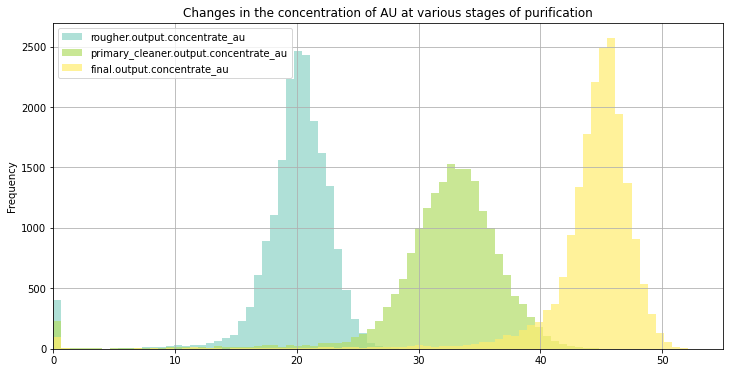

In [16]:
plt = au_concentrate.plot(kind='hist', bins=80, figsize=(12,6), legend=True, alpha=0.7, fontsize=10, grid=True, 
                    title='Changes in the concentration of AU at various stages of purification', xlim=(0, 55), cmap=cmap)

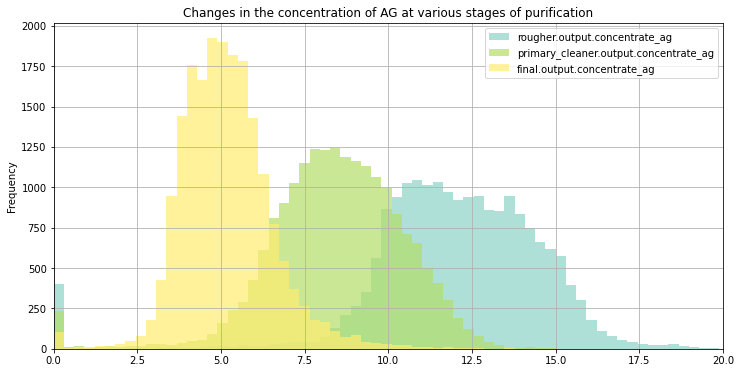

In [17]:
plt = ag_concentrate.plot(kind='hist', bins=80, figsize=(12,6), legend=True, alpha=0.7, fontsize=10, grid=True, 
                    title='Changes in the concentration of AG at various stages of purification', xlim=(0, 20), cmap=cmap)

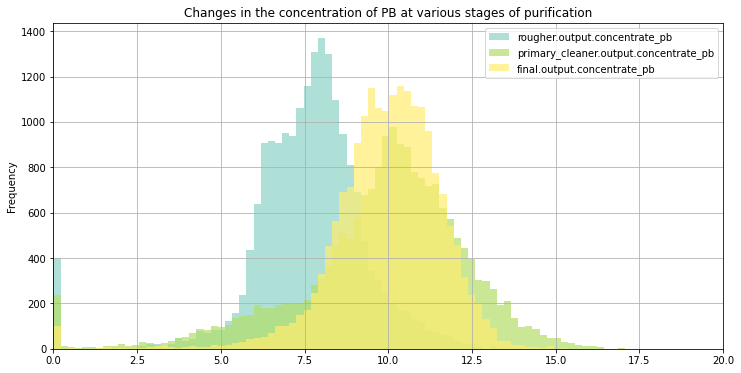

In [18]:
plt = pb_concentrate.plot(kind='hist', bins=80, figsize=(12,6), legend=True, alpha=0.7, fontsize=10, grid=True, 
                    title='Changes in the concentration of PB at various stages of purification', xlim=(0, 20), cmap=cmap)

На графиках чётко видна главная тенденция: на каждом этапе в среднем повышается концентрация золота в золотосодержащей руде. Глядя на второй график, видим, что в среднем концентрация серебра с каждым этапом уменьшается. На третьем графике видно, что свинец, в целом, после первого этапа очистки увеличивается в доле концентрации, однако незначительно, при этом второй и третий этап происходит почти одинаково. Также заметили аномальные значения, близкие к нули. Проверим графики расчётами:

In [19]:
print('Изменение концентрации золота в ходе обработки:')
print(df_full[['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 
                          'final.output.concentrate_au']].mean())
print()
print('Изменение концентрации серебра в ходе обработки:')
print(df_full[['rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 
                          'final.output.concentrate_ag']].mean())
print()
print('Изменение концентрации свинца в ходе обработки:')
print(df_full[['rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 
                          'final.output.concentrate_pb']].mean())

Изменение концентрации золота в ходе обработки:
rougher.output.concentrate_au            19.772000
primary_cleaner.output.concentrate_au    32.119400
final.output.concentrate_au              44.076513
dtype: float64

Изменение концентрации серебра в ходе обработки:
rougher.output.concentrate_ag            11.994759
primary_cleaner.output.concentrate_ag     8.442408
final.output.concentrate_ag               5.168387
dtype: float64

Изменение концентрации свинца в ходе обработки:
rougher.output.concentrate_pb            7.606272
primary_cleaner.output.concentrate_pb    9.810317
final.output.concentrate_pb              9.978821
dtype: float64


Действительно, описанное по графикам совпадает с расчётами. Значит, всё выполнено верно. Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Это необходимо сделать, так как если распределения сильно отличаются друг от друга, оценка модели будет неправильной. Сначала выберем необходимые столбцы с размерами гранул из обучающей и тестовой выборок:

In [20]:
feed_size_train = df_train_chosen[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
feed_size_test = df_test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]

Теперь объединим в 2 датафрейма данные обучающей и тестовой выборок по процессу: `rougher` и `primary`:

In [21]:
feed_size_rougher = pd.concat([feed_size_train['rougher.input.feed_size'], 
                               feed_size_test['rougher.input.feed_size']], axis=1)
feed_size_primary = pd.concat([feed_size_train['primary_cleaner.input.feed_size'], 
                               feed_size_test['primary_cleaner.input.feed_size']], axis=1)

Построим боксплоты для двух датафреймов, чтобы сравнить распределения размеров гранул сырья:

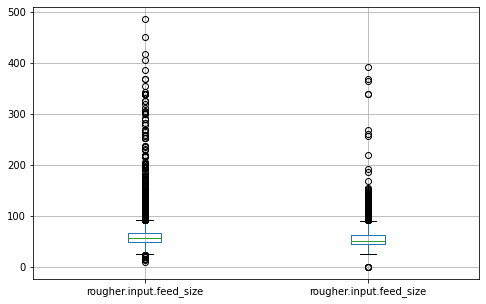

In [22]:
plt = feed_size_rougher.boxplot(figsize=(8, 5), grid=True, fontsize=10)

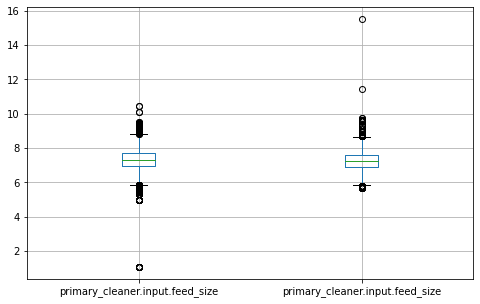

In [23]:
plt = feed_size_primary.boxplot(figsize=(8, 5), grid=True, fontsize=10)

Как видно по графикам, 50% значений в обоих случаях лежат примерно в одинаковых значениях, а медианы достаточно близки друг к другу. Однако, на этапе `rougher` наблюдается существенно больше выбросов, при этом в обучающих данных этот разброс больше. С другой стороны, в данном контексте выбросы являются для нас незначимыми, а мы получаем главный необходимый вывод - оценка модели неправильной не будет.

В завершении анализа данных исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. Для этого соберём необходимые данные в датафреймы:

In [24]:
try:
    df_rougher = au_concentrate['rougher.output.concentrate_au'] + ag_concentrate['rougher.output.concentrate_ag']
    + pb_concentrate['rougher.output.concentrate_pb']
    df_primary = au_concentrate['primary_cleaner.output.concentrate_au'] + ag_concentrate['primary_cleaner.output.concentrate_ag'] 
    + pb_concentrate['primary_cleaner.output.concentrate_pb']
    df_final = au_concentrate['final.output.concentrate_au'] + ag_concentrate['final.output.concentrate_ag']
    + pb_concentrate['final.output.concentrate_pb']
    print('Необходимые данные успешно собраны')
except:
    print('Необходимых данных нет, необходимо повторить')

Необходимые данные успешно собраны


Теперь построим гистограммы по каждому этапу, чтобы оценить суммарную концентрацию веществ:

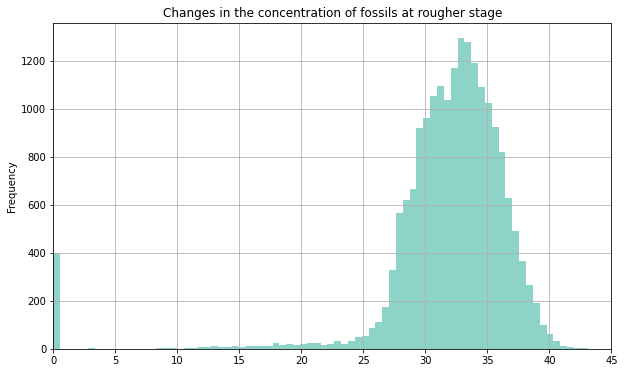

In [25]:
#построение гистограммы по этапу 'rougher'
plt = df_rougher.plot(kind='hist', bins=80, figsize=(10,6), fontsize=10, grid=True, 
                    title='Changes in the concentration of fossils at rougher stage', xlim=(0, 45), cmap=cmap)

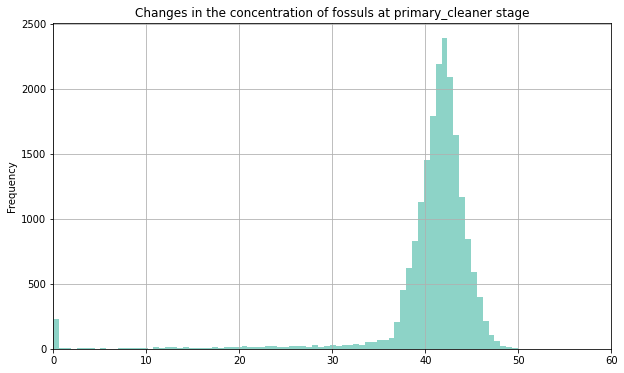

In [26]:
#построение гистограммы по этапу 'primary_cleaner'
plt = df_primary.plot(kind='hist', bins=80, figsize=(10,6), fontsize=10, grid=True, 
                    title='Changes in the concentration of fossuls at primary_cleaner stage', xlim=(0, 60), cmap=cmap)

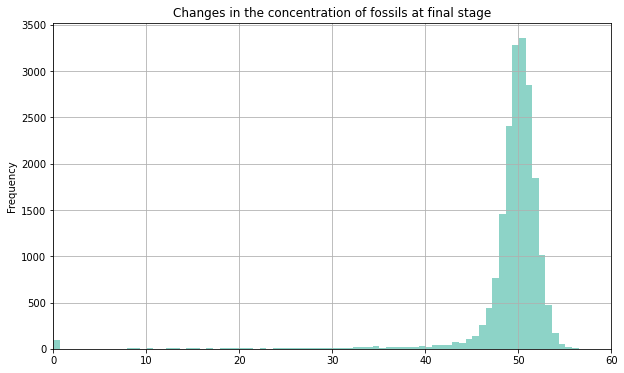

In [27]:
#построение гистограммы по этапу 'final'
plt = df_final.plot(kind='hist', bins=80, figsize=(10,6), fontsize=10, grid=True, 
                    title='Changes in the concentration of fossils at final stage', xlim=(0, 60), cmap=cmap)

### Вывод

На этапе анализа данных было рассмотрено, как меняется концентрация металлов на различных этапах очистки. На каждом этапе в среднем повышается концентрация золота в золотосодержащей руде, концентрация серебра с каждым этапом уменьшается, а свинец, в целом, после первого этапа очистки увеличивается в доле концентрации, однако незначительно, при этом второй и третий этап происходит почти одинаково. В нулевых значениях всех суммарных концентраций есть немалое количество нулевых значений. Значит, в суммарной руде есть какие-то количества ненужных примесей.
Также провели сравнение размеров гранулов в обучающей и тестовой выборках, чтобы убедиться, что оценка модели будет правильной. Получили, что размер гранул на 1 этапе очистки составил примерно 60 в обоих случаях, а на 2 этапе - чуть более 7. Медианы находятся близко друг к другу, что говорит о хорошем качестве выборок для модели.
На данном этапе рассмотрели общую концентрацию всех веществ на разных стадиях. Видно, что с каждой стадией разброс значений существенно снижается, следовательно, происходит качественная очистка материала. Далее можно переходить к построению модели.

## Модель

Напишем функции для вычисления `sMAPE` и итогового `sMAPE`:

In [28]:
def smape(target, predicted):
    result = 0
    for key in range(0, len(predicted)):
        result += abs(target[key] - predicted[key]) / ((abs(target[key]) + abs(predicted[key])) / 2)
    result = (result / len(predicted)) * 100
    return result

def final_smape(target_rougher, predicted_rougher, target_final, predicted_final):
    return 0.25 * smape(target_rougher, predicted_rougher) + 0.75 * smape(target_final, predicted_final)

Объединим данные в отдельные датафреймы:

In [29]:
df_target = df_full[df_full.index.isin(df_train_chosen.index)][['rougher.output.recovery', 'final.output.recovery']]
df_test_target = df_full[df_full.index.isin(df_test.index)][['rougher.output.recovery', 'final.output.recovery']]

In [30]:
df_test_target

,rougher.output.recovery,final.output.recovery
date,,
2016-09-01 00:59:59,89.993421,70.273583
2016-09-01 01:59:59,88.089657,68.910432
2016-09-01 02:59:59,88.412756,68.143213
2016-09-01 03:59:59,87.360133,67.776393
2016-09-01 04:59:59,83.236367,61.467078
...,...,...
2017-12-31 19:59:59,95.172585,68.919891
2017-12-31 20:59:59,94.575036,68.440582
2017-12-31 21:59:59,93.018138,67.092759


Объединим в отдельные датафреймы процессы в зависимости от этапа, на котором они происходят:

In [31]:
rougher_columns = ['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 
                   'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 
                   'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate',
                   'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 
                   'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 
                   'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 
                   'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 
                   'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_d_level', 
                   'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_e_level', 
                   'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_f_level'
                    ]

final_columns = ['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant', 'primary_cleaner.input.feed_size', 
                 'primary_cleaner.input.xanthate','primary_cleaner.state.floatbank8_a_air', 
                 'primary_cleaner.state.floatbank8_a_level', 'primary_cleaner.state.floatbank8_b_air', 
                 'primary_cleaner.state.floatbank8_b_level', 'primary_cleaner.state.floatbank8_c_air',
                 'primary_cleaner.state.floatbank8_c_level', 'primary_cleaner.state.floatbank8_d_air', 
                 'primary_cleaner.state.floatbank8_d_level', 'secondary_cleaner.state.floatbank2_a_air', 
                 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleaner.state.floatbank2_b_air', 
                 'secondary_cleaner.state.floatbank2_b_level', 'secondary_cleaner.state.floatbank3_a_air',
                 'secondary_cleaner.state.floatbank3_a_level', 'secondary_cleaner.state.floatbank3_b_air', 
                 'secondary_cleaner.state.floatbank3_b_level', 'secondary_cleaner.state.floatbank4_a_air', 
                 'secondary_cleaner.state.floatbank4_a_level', 'secondary_cleaner.state.floatbank4_b_air', 
                 'secondary_cleaner.state.floatbank4_b_level', 'secondary_cleaner.state.floatbank5_a_air', 
                 'secondary_cleaner.state.floatbank5_a_level', 'secondary_cleaner.state.floatbank5_b_air', 
                 'secondary_cleaner.state.floatbank5_b_level', 'secondary_cleaner.state.floatbank6_a_air', 
                 'secondary_cleaner.state.floatbank6_a_level'
                    ]

In [32]:
df_rougher_train = df_train_chosen[rougher_columns]
df_rougher_target = df_target['rougher.output.recovery']
df_final_train = df_train_chosen[final_columns]
df_final_target = df_target['final.output.recovery']

Так как в данных переменные имеют различную масштабность, необходимо промасштабировать их, чтобы большие показатели не вносили большего вклада исключительно из-за их модулей:

In [33]:
rougher_scaler = StandardScaler()
rougher_scaler.fit(df_rougher_train[rougher_columns])
df_rougher_train[rougher_columns] = rougher_scaler.transform(df_rougher_train[rougher_columns])

final_scaler = StandardScaler()
final_scaler.fit(df_final_train[final_columns])
df_final_train[final_columns] = final_scaler.transform(df_final_train[final_columns])

In [34]:
df_test[rougher_columns] = rougher_scaler.transform(df_test[rougher_columns])
df_test[final_columns] = final_scaler.transform(df_test[final_columns])

Возьмём для работы модель случайного леса и при помощи кроссвалидации найдём наилучшие параметры для этой модели:

In [35]:
scorer = make_scorer(smape, greater_is_better=False)
parameters = {'n_estimators': range(1, 12),'max_depth': range(1,12)}
model = RandomForestRegressor()
grid = GridSearchCV(model, parameters, cv=3, scoring=scorer)
grid.fit(df_rougher_train, df_rougher_target)
grid.best_params_

{'max_depth': 1, 'n_estimators': 5}

Кроссвалидация показала, что для случайного леса наилучшими параметрами являются максимальная глубина - 1, количество деревьев - 5. Запомним эти параметры. Посмотрим метрику модели при данных наилучших параметрах:

Посмотрим модель линейной регрессии и оценим её метрику:

In [36]:
model_lr = LinearRegression()

scores = cross_val_score(model_lr, df_rougher_train, df_rougher_target, cv=5, scoring=scorer)
mean_score = abs(sum(scores)/len(scores))
model_lr.fit(df_rougher_train, df_rougher_target)
predicted_rougher = model_lr.predict(df_test[rougher_columns])
rougher_smape_lr = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape_lr
model_lr.fit(df_final_train, df_final_target)
predicted_final = model_lr.predict(df_test[final_columns])
final_smape_lr = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape_lr
final_smape(df_test_target['rougher.output.recovery'], predicted_rougher, df_test_target['final.output.recovery'], predicted_final)

10.106872729885032

Посмотрим метрику случайного леса:

In [37]:
model.fit(df_final_train, df_final_target)
predicted_final = model.predict(df_test[final_columns])
final_smape = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape

12.169096081847202

Как видно, метрика линейной регрессии получилась немного ниже, чем у случайного леса. Следовательно, модель случайного леса подходит под наше исследование лучше. В завершении исследования проверим модель на адекватность. Сравним значение метрики случайного леса с метриками константной модели на отдельных процессах:

In [38]:
dummy = DummyRegressor(strategy="median")
dummy.fit(df_rougher_train, df_rougher_target)
predicted_rougher = dummy.predict(df_test[rougher_columns])
rougher_smape_dummy = smape(df_test_target['rougher.output.recovery'], predicted_rougher)
rougher_smape_dummy

8.627729267935692

In [39]:
dummy.fit(df_final_train, df_final_target)
predicted_final = dummy.predict(df_test[final_columns])
final_smape_dummy = smape(df_test_target['final.output.recovery'], predicted_final)
final_smape_dummy

9.763982508185252

### Вывод

Случайный лес оказался наиболее подходящей моделью под исследование, о чём говорит значение метрики 12.16 против 10.1 у линейной регрессии. Также проверили модель случайного леса на адекватность, сравнив её со значениями метрики константной модели на отдельных процессах. Видно, что 12.16 превышает как 8.62, так и 9.76, следовательно, случайный лес представляется лучшей моделью в сравнении с константной. Можем переходить к общему выводу исследования.

## Общий вывод

Цель исследования заключалась в подготовке прототипа модели по разработке решения для оценки эффективности работы предприятий. Для этого был проведён исследовательский анализ данных, который продемонстрировал, что обучающая и тестовая выборки разделены корректно, и метрика на модели будет оценена соответственно. Получили, что размер гранул на 1 этапе очистки составил примерно 60 в обоих случаях, а на 2 этапе - чуть более 7. Медианы находятся близко друг к другу, что говорит о хорошем качестве выборок для модели. 
В завершении исследования рассмотрели 2 модели: случайный лес решений и линейная регрессия. Так как метрика случайного леса составила 12.16, а у линейной регрессии - 10.1, для заказчика выбрана первая модель. При этом, модель была оценена на адекватность, в результате чего получили её лучшие показатели в сравнении с константой моделью. При помощи случайного леса заказчик может добиться лучших оценок своей деятельности.